# Spatial$^{*}$ Microsimulation Urban Metabolism Model (SMUM)

## Case Study: Brussels

<div class="image123">
    <div class="imgContainer">
        <img src="./logos/UNEnvironment.png" alt="UNEP logo" style="width:200px">
    </div>
    <div class="imgContainer">
        <img src="./logos/GI-REC.png" alt="GI_REC logo" style="width:200px">
    </div>
</div>

# 2.b Non-Residential Model

[UN Environment](http://www.unep.org/)

In [11]:
import datetime; print(datetime.datetime.now())

2018-02-15 16:37:53.979823


**Notebook abstract**

This notebook shows the main sampling and reweighting algorithm for the non-residential sector.

## Import libraries

In [12]:
from urbanmetabolism.population.model import run_calibrated_model
from urbanmetabolism.population.model import plot_data_projection
from urbanmetabolism.population.model import TableModel

In [13]:
#from urbanmetabolism._scripts.material_btyp import get_den

In [14]:
#year = 2030
#sqm = 60
#construction = "SFH"
#d = get_den(year, construction, sqm)

## Global variables

In [15]:
iterations = 10000
benchmark_year = 2016
census_file = 'data/benchmarks_nonresidential.csv'
typ = 'resampled'
model_name = 'Brussels_NonResidentialElectricity_wbias_projected_dynamic_{}'.format(typ)
verbose = False
drop_col_survey = ['h_BuildingHeat', 'c_BuldingCool', 'e_BuildingElec',
                   'h_BuildingSqm', 'c_BuildingSqm']

## Define model

In [16]:
tm = TableModel(census_file = census_file, verbose=verbose)
table_model_name = 'data/table_elec_nr_{}.csv'

### Electricity

In [17]:
estimate_var = 'elec'
tm.add_model(table_model_name.format('e'), estimate_var, static = True)
estimate_var = 'heat'
tm.add_model(table_model_name.format('h'), estimate_var, static = True)
estimate_var = 'cool'
tm.add_model(table_model_name.format('c'), estimate_var, static = True)
#tm.update_dynamic_model(estimate_var, specific_col = 'BuildingKwh', static=True)

In [18]:
tm.models['cool'].loc[2020]

,co_mu,co_sd,p,dis,lb,ub
c_BuildingSqm,"3600.0,525.0,11100.0,12000.0,4650.0,105.0,105....","36.0,5.25,111.0,120.0,46.5,1.05,1.05,0.39,1.05...","0.00383471907281,0.00152179390275,0.0001305114...",Deterministic;c;Categorical,0,inf
c_BuildingCool,"42.9002267754,125.188571429,23.4353153153,31.9...","0.429002267754,1.25188571429,0.234353153153,0....","0.00383471907281,0.00152179390275,0.0001305114...",Deterministic;BuildingSqm;Categorical,0,inf


In [19]:
formula_nrb = "c_e_BuildingElec * e_BuildingElec * c_e_BuildingSqm * e_BuildingSqm"
tm.add_formula(formula_nrb, 'elec')

In [20]:
formula_nrb = "c_h_BuildingHeat * h_BuildingHeat * c_e_BuildingSqm * e_BuildingSqm"
tm.add_formula(formula_nrb, 'heat')

In [21]:
formula_nrb = "c_c_BuildingCool * c_BuildingCool * c_e_BuildingSqm * e_BuildingSqm"
tm.add_formula(formula_nrb, 'cool')

In [22]:
table_model = tm.make_model()
tm.to_excel()

creating data/tableModel_elec.xlsx
creating data/tableModel_heat.xlsx
creating data/tableModel_cool.xlsx


## Run model

In [ ]:
fw = run_calibrated_model(
    table_model,
    verbose = verbose,
    project = typ,
    census_file = census_file,
    year = benchmark_year,
    population_size = False,
    name = '{}_{}'.format(model_name, iterations),
    iterations = iterations,
    align_census = False,
    drop_col_survey = drop_col_survey
)

## Plot results

In [24]:
reweighted_survey = 'data/survey_{}_{}'.format(model_name, iterations)

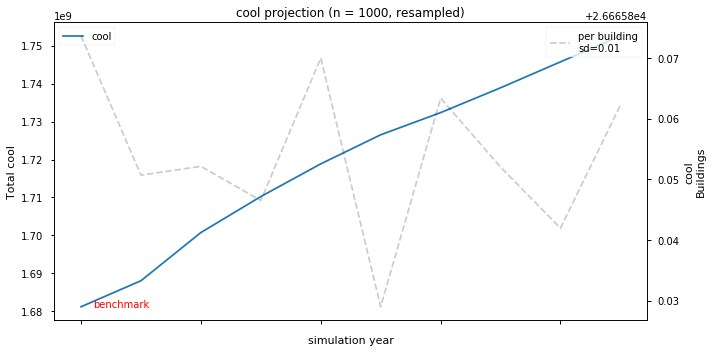

In [28]:
data = plot_data_projection(
    reweighted_survey, [estimate_var], "{}, {}".format(iterations, typ),
    start_year = 2016, end_year = 2025, aspect_ratio = 2,
    benchmark_year = benchmark_year, unit = "building")

<div class="image123">
    <div class="imgContainer">
        <img src="./logos/UNEnvironment.png" alt="UNEP logo" style="width:200px">
    </div>
    <div class="imgContainer">
        <img src="./logos/GI-REC.png" alt="GI_REC logo" style="width:200px">
    </div>
</div>

# 2.b Non-Residential Model

[UN Environment](http://www.unep.org/)

[Home](Welcome.ipynb)

[Next](Bc_GREGWT_validation_wbias.ipynb) (2.c) Model Internal Validation